In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('data/adapt.csv')
df

,size,pin,threads,runtime,usertime,energy
0,500,False,16,0.047249,0.730374,2.039363
1,500,False,16,0.046964,0.730344,2.006647
2,500,False,16,0.047059,0.731278,2.004573
3,500,False,16,0.047141,0.730565,2.007319
4,500,False,16,0.046969,0.730078,2.025935
...,...,...,...,...,...,...
1424,1500,False,8,1.623741,12.900962,67.934824
1425,1500,False,8,1.622583,12.892537,67.794382
1426,1500,False,8,1.623772,12.901146,68.047128
1427,1500,False,8,1.622766,12.893809,68.040109


In [42]:
def optimum(size, pin):
    match (size, pin):
        case (500, True):
            return 15
        case (500, _) | (750, _) | (1000, _):
            return 16
        case (1250, False) | (1500, False):
            return 8
        case (1250, True) | (1500, True):
            return 12
        case _:
            return -1

df['optimum'] = df.apply(lambda x: optimum(x['size'], x['pin']), axis=1)

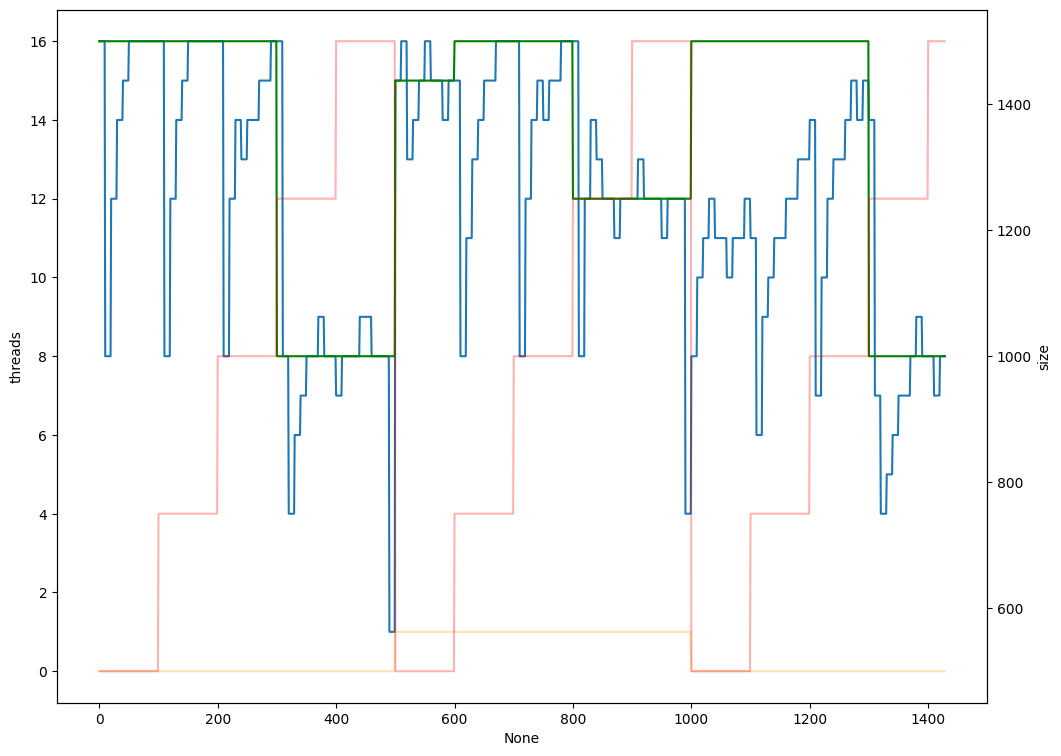

In [48]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(df, x=df.index, y='threads')
sns.lineplot(df, x=df.index, y='optimum', color='g', ax=ax)

sns.lineplot(df, x=df.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.show()